# showq dynamic analysis

## Preprocessing

The output of Adaptive Computing Moab `showq` command has to be preprocessed by `scripts/showq2csv.py`. It will create a CSV file that can be imported by pandas.

## Prerequisites

Import required modules.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
%matplotlib inline

Ensure that modules are reloaded automatically when modified.

In [3]:
%load_ext autoreload
%autoreload 2

In [99]:
from lib.vsc.moab.nb_utils import extract_category
from lib.vsc.moab.metrics import started_jobs, new_jobs, moved_jobs, state_distribution, showq_timeseries

## Analysis

Load the current and the previous showq data.

In [5]:
curr_df = pd.read_csv('data/showq_1528968510.csv', parse_dates=['time_stamp', 'datetime'])

In [6]:
prev_df = pd.read_csv('data/showq_1528967910.csv', parse_dates=['time_stamp', 'datetime'])

Which jobs have started since the last showq epoch? These are the jobs that are currently active, and were previously either idle or blocked.

In [7]:
curr_running_df = extract_category(curr_df, 'ActiveJob')

In [8]:
prev_idle_df = extract_category(prev_df, 'EligibleJob')

In [9]:
prev_blocked_df = extract_category(prev_df, 'BlockedJob')

In [28]:
started_df = started_jobs(curr_running=curr_running_df, prev_idle=prev_idle_df, prev_blocked=prev_blocked_df)
started_df

,category,time_stamp,job_id,user_id,state,procs,remaining,start_time,walltime_limit
0,ActiveJob,2018-06-14 11:28:30,20842191,vsc31821,Running,20,35429,2018-06-14 11:19:22,35977.0
1,ActiveJob,2018-06-14 11:28:30,20842195,vsc31835,Running,80,172601,2018-06-14 11:25:34,172777.0


So two jobs that were idle are now running. Which jobs were blocked and are now running?

Which jobs were idle, and are now blocked?

In [30]:
curr_blocked_df = extract_category(curr_df, 'BlockedJob')

In [31]:
moved_jobs(from_cat=prev_idle_df, to_cat=curr_blocked_df)

,category,time_stamp,job_id,user_id,state,procs,walltime_limit,queue_time,time_in_queue


How many jobs are idle now, and how many were idle in the previous epoch?

In [12]:
curr_idle_df = extract_category(curr_df, 'EligibleJob')

In [14]:
curr_idle_df.job_id.count(), prev_idle_df.job_id.count()

(116, 117)

## Time series

Analyze the state of jobs as a time series. The simplest representation is the number of jobs in a given state as a function of time.

In [111]:
directory = Path.cwd() / 'data'
pattern = 'showq_*.csv'
queue_timeseries = showq_timeseries(directory, pattern)

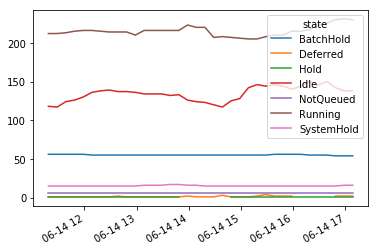

In [113]:
queue_timeseries.plot();